# Flight Price Prediction

# Problem Statement:
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records



# FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Train dataset

In [3]:
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

# Test Dataset

In [5]:
dts = pd.read_excel("Test_set.xlsx")
dts

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:

## Lets check if there are any null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Density'>

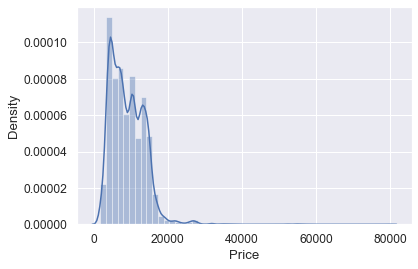

In [9]:

sns.set(style="darkgrid", palette='deep', font_scale=1.1)
sns.distplot(data['Price'])


From the above we can see that the ticket prices are higly postively skewed, so we need to treat the skweness.

In [10]:
from scipy.stats import boxcox
data['Price']=boxcox(data['Price'],0)

# Lets do the EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

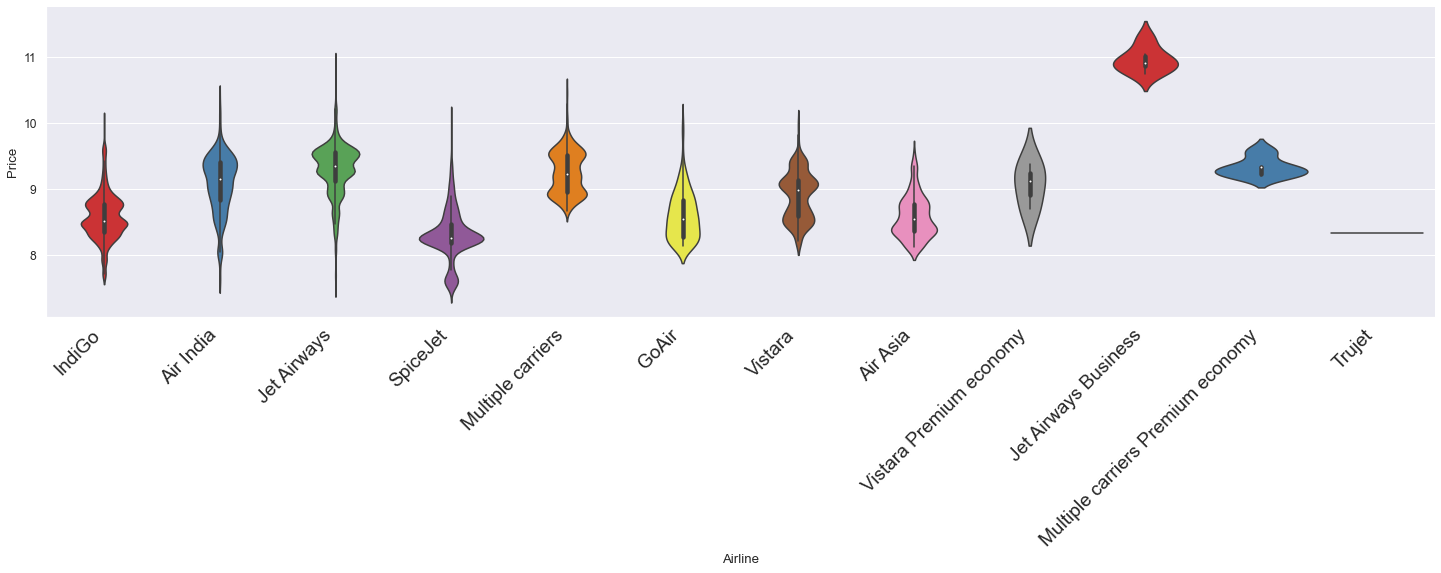

In [11]:
sns.set(font_scale=1.1)
sns.catplot(x='Airline',y='Price',kind='violin',data=data,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

From the above we can see that the second cheapest Indigo's ranges from 8 to 9, and spicejet has the cheapest flight fares.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

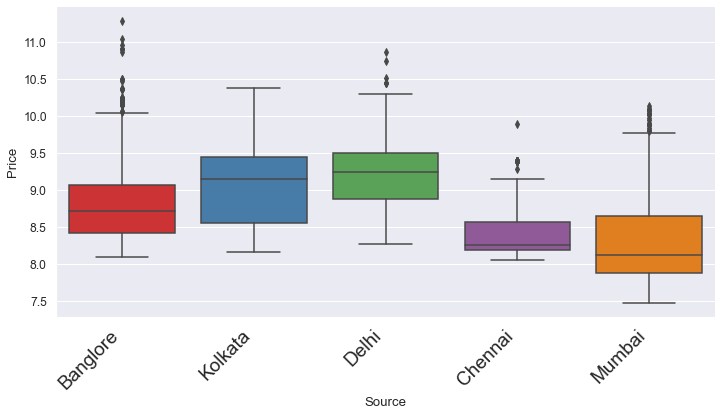

In [12]:
sns.set(font_scale=1.1)
sns.catplot(x='Source',y='Price',kind='box',data=data,aspect=2,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

From the above we can see that the price of most of the source are ranging from 8 to 9, however their are some outliers as due to rush booking.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

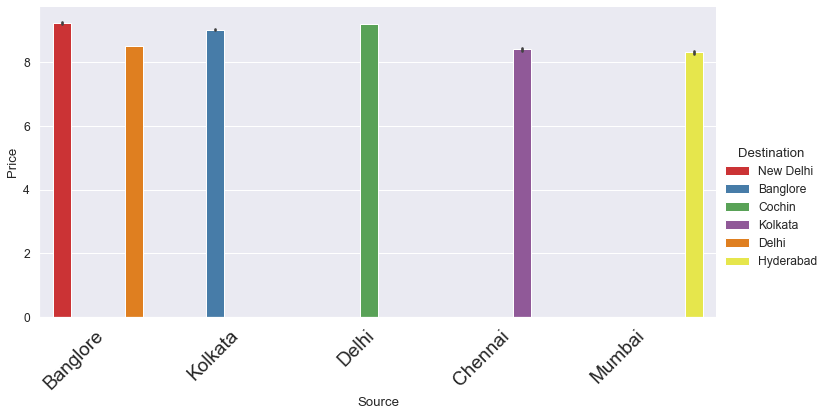

In [13]:
sns.set(font_scale=1.1)
sns.catplot(x='Source',y='Price',hue='Destination',kind='bar',data=data,aspect=2,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

From the above we can see that most of the destinations average price are more than 8, at this point we can't do much EDA as most of the features are categorical features.



# Lets do Feature Engineering.

In [14]:
data['Data']='Train'
dts['Data']='Test'
dts['Price']= 0

In [15]:
data1=pd.concat([data,dts])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Data
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,8.267962,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,8.944028,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9.538348,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,8.735204,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,9.495670,Train


In [16]:
data1['Date_of_journey']=data1['Date_of_Journey'].str.split('/').str[0]
data1['Month_of_journey']=data1['Date_of_Journey'].str.split('/').str[1]
data1['Year_of_journey']=data1['Date_of_Journey'].str.split('/').str[2]
data1['Arrival_Time']=data1['Arrival_Time'].str.split(' ').str[0]
data1['Arrival_Hour']=data1['Arrival_Time'].str.split(':').str[0]
data1['Arrival_Minute']=data1['Arrival_Time'].str.split(':').str[1]
data1['Dep_Hour']=data1['Dep_Time'].str.split(':').str[0]
data1['Dep_Minute']=data1['Dep_Time'].str.split(':').str[1]
data1['Duration_hour']=data1['Duration'].str.split('h').str[0]
data1['Duration']=data1['Duration'].str.split(' ').str[1]
data1['Duration_minute']=data1['Duration'].str.split('m').str[0]
data1['Duration_minute'].fillna('0',inplace=True)
data1.drop(['Arrival_Time'],axis=1,inplace=True)
data1.drop(['Dep_Time'],axis=1,inplace=True)
data1.drop(['Date_of_Journey'],axis=1,inplace=True)
data1.drop(['Duration'],axis=1,inplace=True)

In [17]:
data1['Duration_hour'].value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     331
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
47       2
42       2
5m       2
40       2
41       1
Name: Duration_hour, dtype: int64

In [18]:
#data[data['Duration_hour']=='5m']=0
def ext(data):
    if data=='5m':
        j='0'
    else:
        j=data
    return j

data1['Duration_hour']=data1['Duration_hour'].apply(lambda j:ext(j))

In [19]:
data1['Duration_hour'].value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     331
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
40       2
47       2
42       2
0        2
41       1
Name: Duration_hour, dtype: int64

In [20]:
data1['Duration_minute'].value_counts()

30    1818
0     1286
20    1260
50    1205
45    1154
35    1149
15    1135
55    1121
25    1009
40     803
5      767
10     647
Name: Duration_minute, dtype: int64

In [21]:
data1.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         1
Additional_Info     0
Price               0
Data                0
Date_of_journey     0
Month_of_journey    0
Year_of_journey     0
Arrival_Hour        0
Arrival_Minute      0
Dep_Hour            0
Dep_Minute          0
Duration_hour       0
Duration_minute     0
dtype: int64

In [22]:
data1['Date_of_journey']=data1['Date_of_journey'].astype(int)
data1['Month_of_journey']=data1['Month_of_journey'].astype(int)
data1['Year_of_journey']=data1['Year_of_journey'].astype(int)
data1['Arrival_Hour']=data1['Arrival_Hour'].astype(int)
data1['Arrival_Minute']=data1['Arrival_Minute'].astype(int)
data1['Dep_Hour']=data1['Dep_Hour'].astype(int)
data1['Dep_Minute']=data1['Dep_Minute'].astype(int)
data1['Duration_hour']=data1['Duration_hour'].astype(int)
data1['Duration_minute']=data1['Duration_minute'].astype(int)

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Total_Stops       13353 non-null  object 
 5   Additional_Info   13354 non-null  object 
 6   Price             13354 non-null  float64
 7   Data              13354 non-null  object 
 8   Date_of_journey   13354 non-null  int32  
 9   Month_of_journey  13354 non-null  int32  
 10  Year_of_journey   13354 non-null  int32  
 11  Arrival_Hour      13354 non-null  int32  
 12  Arrival_Minute    13354 non-null  int32  
 13  Dep_Hour          13354 non-null  int32  
 14  Dep_Minute        13354 non-null  int32  
 15  Duration_hour     13354 non-null  int32  
 16  Duration_minute   13354 non-null  int32  

In [24]:
data1['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BOM → DED → DEL → HYD             1
BOM → VNS → DEL → HYD             1
BOM → RPR → VTZ → HYD             1
BLR → HBX → BOM → BHO → DEL       1
Name: Route, Length: 132, dtype: int64

In [25]:
data1['Stop_1']=data1['Route'].str.split('→ ').str[0]
data1['Stop_2']=data1['Route'].str.split('→ ').str[1]
data1['Stop_3']=data1['Route'].str.split('→ ').str[2]
data1['Stop_4']=data1['Route'].str.split('→ ').str[3]
data1['Stop_5']=data1['Route'].str.split('→ ').str[4]
data1['Stop_6']=data1['Route'].str.split('→ ').str[5]
data1.drop(['Route'],axis=1, inplace=True)

In [26]:
data1['Stop_1'].fillna('None',inplace=True)
data1['Stop_2'].fillna('None',inplace=True)
data1['Stop_3'].fillna('None',inplace=True)
data1['Stop_4'].fillna('None',inplace=True)
data1['Stop_5'].fillna('None',inplace=True)
data1['Stop_6'].fillna('None',inplace=True)

In [27]:
data1['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [28]:

data1['Total_Stops'].replace(['non-stop'],['0 Direct'],inplace=True)

In [29]:
data1['Total_Stops'].value_counts()

1 stop      7056
0 Direct    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [30]:
data1['Stops']=data1['Total_Stops'].str.split(' ').str[0]

In [31]:
data1['Stops'].fillna('0',inplace=True)
data1.drop(['Total_Stops'],axis=1,inplace=True)

In [32]:
data1['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Stop_1']=le.fit_transform(data1['Stop_1'])
data1['Stop_2']=le.fit_transform(data1['Stop_2'])
data1['Stop_3']=le.fit_transform(data1['Stop_3'])
data1['Stop_4']=le.fit_transform(data1['Stop_4'])
data1['Stop_5']=le.fit_transform(data1['Stop_5'])
data1['Stop_6']=le.fit_transform(data1['Stop_6'])
data1['Source']=le.fit_transform(data1['Source'])
data1['Airline']=le.fit_transform(data1['Airline'])
data1['Additional_Info']=le.fit_transform(data1['Additional_Info'])
data1['Destination']=le.fit_transform(data1['Destination'])

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  int32  
 1   Source            13354 non-null  int32  
 2   Destination       13354 non-null  int32  
 3   Additional_Info   13354 non-null  int32  
 4   Price             13354 non-null  float64
 5   Data              13354 non-null  object 
 6   Date_of_journey   13354 non-null  int32  
 7   Month_of_journey  13354 non-null  int32  
 8   Year_of_journey   13354 non-null  int32  
 9   Arrival_Hour      13354 non-null  int32  
 10  Arrival_Minute    13354 non-null  int32  
 11  Dep_Hour          13354 non-null  int32  
 12  Dep_Minute        13354 non-null  int32  
 13  Duration_hour     13354 non-null  int32  
 14  Duration_minute   13354 non-null  int32  
 15  Stop_1            13354 non-null  int32  
 16  Stop_2            13354 non-null  int32  

In [35]:
data1['Stops'].value_counts()

1    7056
0    4341
2    1899
3      56
4       2
Name: Stops, dtype: int64

In [36]:
data1['Stops']=data1['Stops'].astype(int)

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  int32  
 1   Source            13354 non-null  int32  
 2   Destination       13354 non-null  int32  
 3   Additional_Info   13354 non-null  int32  
 4   Price             13354 non-null  float64
 5   Data              13354 non-null  object 
 6   Date_of_journey   13354 non-null  int32  
 7   Month_of_journey  13354 non-null  int32  
 8   Year_of_journey   13354 non-null  int32  
 9   Arrival_Hour      13354 non-null  int32  
 10  Arrival_Minute    13354 non-null  int32  
 11  Dep_Hour          13354 non-null  int32  
 12  Dep_Minute        13354 non-null  int32  
 13  Duration_hour     13354 non-null  int32  
 14  Duration_minute   13354 non-null  int32  
 15  Stop_1            13354 non-null  int32  
 16  Stop_2            13354 non-null  int32  

# Now Lets Split and scale our data

In [38]:
Trainfinal=data1.loc[data1['Data']=='Train']
Testfinal=data1.loc[data1['Data']=='Test']
Trainfinal.drop(['Data'],axis=1,inplace=True)
Testfinal.drop(['Data'],axis=1,inplace=True)

In [39]:

xtst=Testfinal.drop(['Price'],axis=True)

In [40]:
x=Trainfinal.drop(['Price'],axis=True)
x.head()

,Airline,Source,Destination,Additional_Info,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Stop_1,Stop_2,Stop_3,Stop_4,Stop_5,Stop_6,Stops
0,3,0,5,8,24,3,2019,1,10,22,20,2,50,0,13,24,12,4,1,0
1,1,3,0,8,1,5,2019,13,15,5,50,7,25,2,25,1,3,4,1,2
2,4,2,1,8,9,6,2019,4,25,9,25,19,0,3,32,4,5,4,1,2
3,3,3,0,8,12,5,2019,23,30,18,5,5,25,2,34,3,12,4,1,1
4,3,0,5,8,1,3,2019,21,35,16,50,4,45,0,34,8,12,4,1,1


In [41]:
y=Trainfinal['Price']
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x,xtst)

In [43]:
from sklearn.model_selection import train_test_split,cross_val_score

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7478, 20), (3205, 20), (7478,), (3205,))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=97)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)

In [48]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [49]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression()
R2_score =  0.6202164931994307
Mean_Squared_Error = 0.10088543206827418
Mean_Absolute_Error = 0.2545396033724501
Root_Mean_Squared_Error = 0.31762467169329617
Cross_Val_Score =  -312901276005.86743


------------------------------------- Lasso -------------------------------
Lasso()
R2_score =  -0.0004946397901461896
Mean_Squared_Error = 0.26577071465671653
Mean_Absolute_Error = 0.4305638509926106
Root_Mean_Squared_Error = 0.5155295478017885
Cross_Val_Score =  -0.0005635818888499733


------------------------------------- Ridge -------------------------------
Ridge()
R2_score =  0.6202119746589848
Mean_Squared_Error = 0.10088663237028056
Mean_Absolute_Error = 0.25454234990884494
Root_Mean_Squared_Error = 0.31762656118511334
Cross_Val_Score =  0.6204765532978448


------------------------------------- DecisionTreeRegressor -------------------------------
DecisionTreeRegressor(random

In [51]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.620216,0.100885,0.254540,0.317625,-3.129013e+11
1,Lasso,-0.000495,0.265771,0.430564,0.515530,-5.635819e-04
2,Ridge,0.620212,0.100887,0.254542,0.317627,6.204766e-01
3,DecisionTreeRegressor,0.892385,0.028587,0.081244,0.169076,9.080809e-01
4,AdaBoostRegressor,0.726292,0.072708,0.218105,0.269643,6.826096e-01
5,RandomForestRegressor,0.930527,0.018455,0.072714,0.135849,9.416531e-01
6,GradientBoostingRegressor,0.872422,0.033890,0.133743,0.184091,8.722668e-01



From the above we can see that Random Forest Regressor is working as best giving us r2_score more than 90, so lets hypertune our model.

In [52]:
from sklearn.model_selection import GridSearchCV
RFRpara={
    "n_estimators"     :[10,100,350],
    "max_features"     :["auto"],
    "min_samples_split":[2,4],
    "bootstrap"        :[True,False],
    }
gFR=GridSearchCV(RFR,param_grid=RFRpara,n_jobs=1,cv=5)
gFR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=97), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'max_features': ['auto'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 100, 350]})

In [53]:
gFR.best_score_ , gFR.best_params_

(0.9340577496938238,
 {'bootstrap': True,
  'max_features': 'auto',
  'min_samples_split': 2,
  'n_estimators': 350})

In [54]:
RFR=RandomForestRegressor(bootstrap = True,                       
 max_features= 'auto',
 min_samples_split= 2,
 n_estimators= 350)

print(cross_val_score(RFR,x,y,cv=10).mean())

0.9421510353862889


From the above we can see that after hypertunning ou model R2_score got increased from 92 to 93 and Cross val score has also increased from 93 to 94. So i choose RandomForest Regressor as our final model.

In [57]:
import joblib
joblib.dump(RFR,'Flight_Ticket_Price_Prediction.obj')

['Flight_Ticket_Price_Prediction.obj']

In [58]:
model=joblib.load('Flight_Ticket_Price_Prediction.obj')